In [1]:
from sklearn import datasets
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
iris = datasets.load_iris()
%matplotlib inline

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


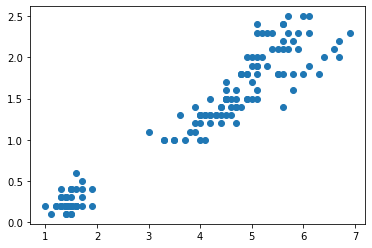

In [4]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [5]:
df['flower'] = iris.target
df =df.drop(['sepal length (cm)' , 'sepal width (cm)'] , axis='columns')
df

,petal length (cm),petal width (cm),flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [6]:
km =KMeans(n_clusters = 3)
y_predict = km.fit_predict(df)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df['cluster'] = y_predict

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

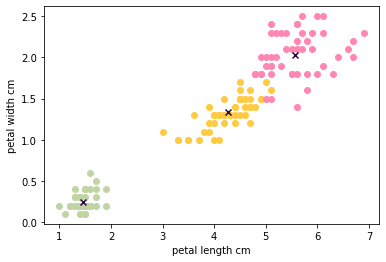

In [11]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'] , color ='#FFCB42')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'] , color ='#C1D5A4')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'] , color ='#FF87B2')
plt.xlabel('petal length cm')
plt.ylabel('petal width cm')
km.cluster_centers_
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = '#2A0944', marker='x')

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),flower,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


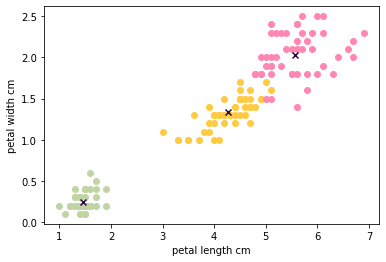

In [19]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'] , color ='#FFCB42')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'] , color ='#C1D5A4')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'] , color ='#FF87B2')
plt.xlabel('petal length cm')
plt.ylabel('petal width cm')
km.cluster_centers_
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = '#2A0944', marker='x')

In [26]:
sse = []
k_values = range(1,10)
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\ainie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


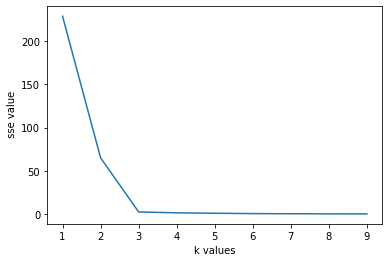

In [27]:
plt.xlabel('k values')
plt.ylabel(' sse value')
plt.plot(k_values , sse)